In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs

In [11]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [12]:
X

array([[-9.00783078, -5.52536409],
       [-9.10207444, -4.85558046],
       [-1.8397768 , -1.84298046],
       ...,
       [-3.5517478 , -1.48318974],
       [ 2.80874248,  7.78727832],
       [-9.24734045, -5.01581471]])

In [8]:
y # we dont use in unsupervied ML 

array([2, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1,
       1, 0, 2, 1, 1, 2, 2, 2, 1, 2, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 2, 1,
       1, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1,
       2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1,
       2, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1])

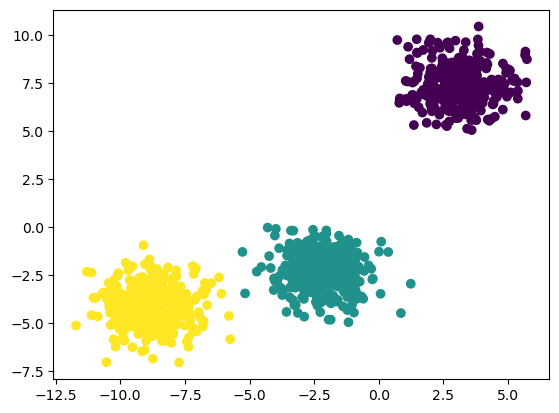

In [13]:
plt.scatter(X[:,0],X[:,1],c=y)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25 , random_state=42)

In [18]:
X_train_scaled=scaler.fit_transform(X_train)

In [19]:
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.cluster import KMeans

In [24]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [25]:
wcss

[1499.9999999999995,
 296.72044300428837,
 59.524314010277735,
 52.161391557490525,
 45.25338231442858,
 38.98650888739347,
 34.48072246408634,
 30.452691181866854,
 26.31573916882422,
 24.206611405265548]

Text(0, 0.5, 'WCSS')

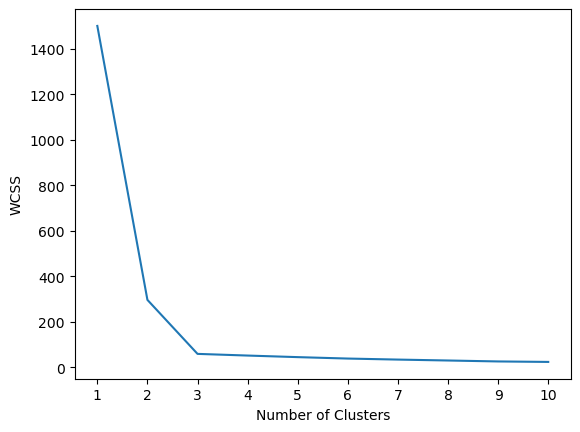

In [27]:
## plot Elbow curve 
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [28]:
kmeans = KMeans(n_clusters=3, init="k-means++")

In [29]:
kmeans.fit_predict(X_train_scaled)

array([1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0,
       2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 2,
       0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1, 0,
       0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 0, 1, 0,
       0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 1, 2,
       1, 2, 1, 0, 1, 0, 2, 1, 0, 1, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0,
       2, 2, 1, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1,
       2, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1,
       1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 0,
       0, 1, 0, 2, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2,

In [30]:
y_pred=kmeans.predict(X_test_scaled)

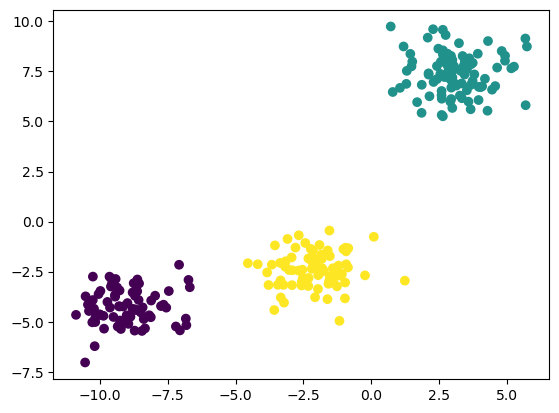

In [31]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [ ]:
## Validating the K value 
# Kneelocator 
# Silhoutee scoring 

In [32]:
!pip install kneed

In [33]:
from kneed import KneeLocator

In [34]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [35]:
kl.elbow

3

In [36]:
## Silhoutte score 
from sklearn.metrics import silhouette_score

In [39]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)          

In [40]:
silhouette_coefficients

[0.7339419959809326,
 0.7706165987607002,
 0.6204701314426003,
 0.4831735124882307,
 0.32434279506787955,
 0.32631627439134003,
 0.340402311291514,
 0.3452991446638589,
 0.33305272142978964]

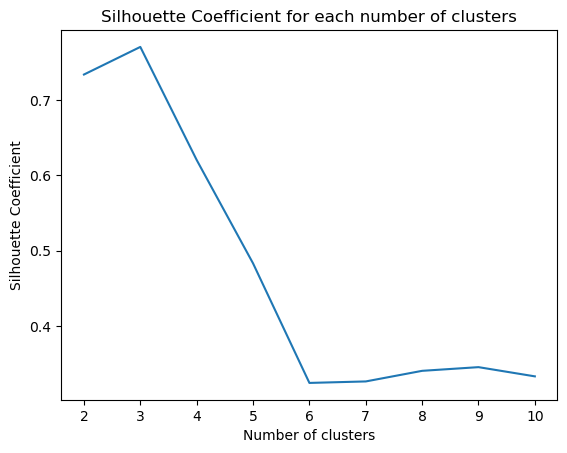

In [41]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.title('Silhouette Coefficient for each number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [42]:
# Take which value is high  3 = High in this 